# EXPLORATORY DATA ANALYSIS 

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
df = pd.read_csv("cleaned_StockPrices.csv")

In [3]:
df.head()

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
0,aal,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,aapl,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,aap,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,abbv,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,abc,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


### 1. Data Quality Check

In [10]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
SYMBOL    0
DATE      0
OPEN      0
HIGH      0
LOW       0
CLOSE     0
VOLUME    0
dtype: int64


In [11]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [15]:
df['DATE'] = pd.to_datetime(df['DATE'])
print(df.dtypes)

SYMBOL            object
DATE      datetime64[ns]
OPEN             float64
HIGH             float64
LOW              float64
CLOSE            float64
VOLUME             int64
dtype: object


### 2. Time Period Analysis

In [17]:
print(f"Date Range: {df['DATE'].min()} to {df['DATE'].max()}")
print(f"Total Trading Days: {df['DATE'].nunique()}")
print(f"Number of Unique Stocks: {df['SYMBOL'].nunique()}")

Date Range: 2014-01-02 00:00:00 to 2017-12-29 00:00:00
Total Trading Days: 1007
Number of Unique Stocks: 505


## Univariate, Bivariate And Multivariate Analysis

### 3. Stock Distribution Analysis

In [21]:
stocks_per_day = df.groupby('DATE')['SYMBOL'].count()
print(f"Average stocks per day: {stocks_per_day.mean():.0f}")
print(f"Min stocks per day: {stocks_per_day.min()}")
print(f"Max stocks per day: {stocks_per_day.max()}")

Average stocks per day: 494
Min stocks per day: 482
Max stocks per day: 505


### 4. Price Statistics by Stock

In [24]:
price_stats = df.groupby('SYMBOL').agg({
    'OPEN': ['mean', 'std', 'min', 'max'],
    'VOLUME': ['mean', 'sum']
}).round(2)
print(price_stats)

          OPEN                             VOLUME             
          mean    std    min     max         mean          sum
SYMBOL                                                        
a        49.09   9.39  33.18   70.50   2191931.57   2207275088
aal      42.42   6.10  25.07   55.89   9751521.26   9819781913
aap     143.21  24.58  79.20  201.24   1137306.71   1145267855
aapl    116.81  24.56  70.74  175.11  45169571.17  45485758169
abbv     63.30  10.47  46.58   98.50   8408835.98   8467697834
...        ...    ...    ...     ...          ...          ...
xyl      43.50   9.70  30.49   69.50   1159214.06   1167328561
yum      76.38   7.71  59.89   94.95   3225015.93   3247591043
zbh     110.54  10.38  88.45  132.51   1349760.22   1359208540
zion     32.67   7.52  20.10   52.02   2758079.00   2777385554
zts      47.25  10.52  28.48   72.97   3485038.12   3509433390

[505 rows x 6 columns]


In [25]:
price_stats.columns = ['Open_Mean', 'Open_Std', 'Open_Min', 'Open_Max', 'Volume_Mean', 'Volume_Total']
price_stats['Price_Range_Pct'] = ((price_stats['Open_Max'] - price_stats['Open_Min']) / price_stats['Open_Mean'] * 100).round(2)
price_stats

,Open_Mean,Open_Std,Open_Min,Open_Max,Volume_Mean,Volume_Total,Price_Range_Pct
SYMBOL,,,,,,,
a,49.09,9.39,33.18,70.50,2191931.57,2207275088,76.02
aal,42.42,6.10,25.07,55.89,9751521.26,9819781913,72.65
aap,143.21,24.58,79.20,201.24,1137306.71,1145267855,85.22
aapl,116.81,24.56,70.74,175.11,45169571.17,45485758169,89.35
abbv,63.30,10.47,46.58,98.50,8408835.98,8467697834,82.02
...,...,...,...,...,...,...,...
xyl,43.50,9.70,30.49,69.50,1159214.06,1167328561,89.68
yum,76.38,7.71,59.89,94.95,3225015.93,3247591043,45.90
zbh,110.54,10.38,88.45,132.51,1349760.22,1359208540,39.86


In [26]:
print("\nTop 10 Stocks by Average Price:")
print(price_stats.nlargest(10, 'Open_Mean')[['Open_Mean', 'Open_Std']])

print("\nTop 10 Stocks by Trading Volume:")
print(price_stats.nlargest(10, 'Volume_Mean')[['Volume_Mean', 'Volume_Total']])


Top 10 Stocks by Average Price:
        Open_Mean  Open_Std
SYMBOL                     
pcln      1390.18    263.65
googl      722.82    156.63
goog       714.52    154.42
azo        660.30    101.10
amzn       619.39    256.58
cmg        517.07    130.54
regn       412.01     75.69
mtd        377.69    122.10
blk        359.94     47.79
biib       310.71     43.85

Top 10 Stocks by Trading Volume:
        Volume_Mean  Volume_Total
SYMBOL                           
bac     89362903.70   89988444028
aapl    45169571.17   45485758169
ge      41443942.52   41734050117
amd     33289509.07   33522535638
f       32914300.94   33144701045
msft    30712613.15   30927601441
fb      29227823.61   29432418373
mu      27962814.08   28158553783
chk     27885401.57   28080599383
intc    27161138.32   27351266285


### 5. Visualization Setup

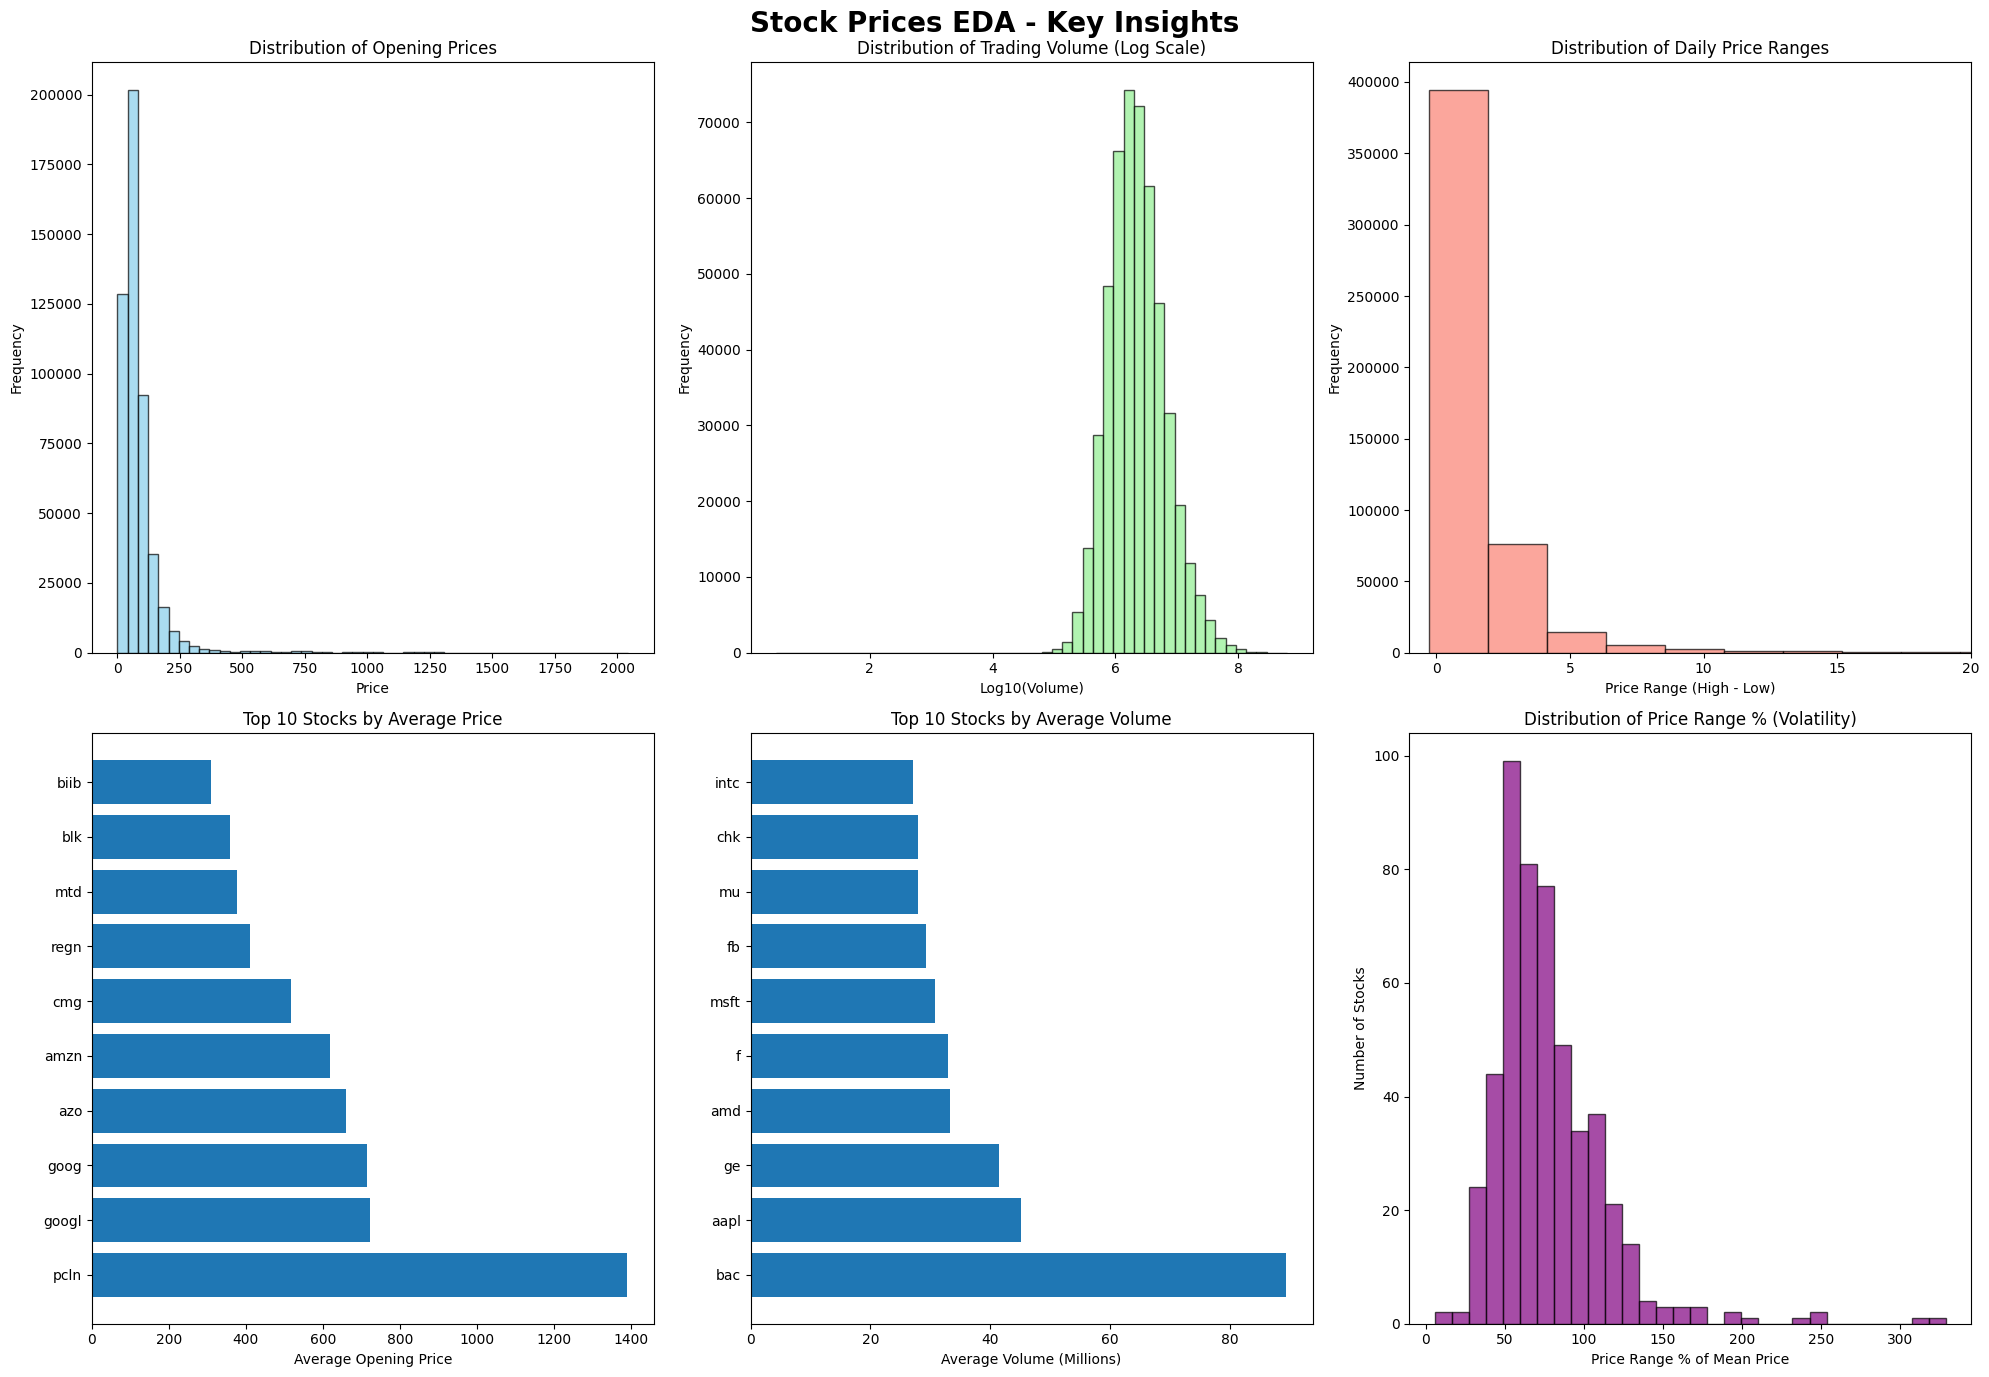

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('Stock Prices EDA - Key Insights', fontsize=20, fontweight='bold')

# 5.1 Price Distribution
axes[0,0].hist(df['OPEN'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Opening Prices')
axes[0,0].set_xlabel('Price')
axes[0,0].set_ylabel('Frequency')

# 5.2 Volume Distribution (log scale)
volume_log = np.log10(df['VOLUME'][df['VOLUME'] > 0])
axes[0,1].hist(volume_log, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Distribution of Trading Volume (Log Scale)')
axes[0,1].set_xlabel('Log10(Volume)')
axes[0,1].set_ylabel('Frequency')

# 5.3 Daily Price Range
df['Price_Range'] = df['HIGH'] - df['LOW']
axes[0,2].hist(df['Price_Range'], bins=50, alpha=0.7, color='salmon', edgecolor='black')
axes[0,2].set_title('Distribution of Daily Price Ranges')
axes[0,2].set_xlabel('Price Range (High - Low)')
axes[0,2].set_ylabel('Frequency')
axes[0,2].set_xlim(-1, 20)
axes[0,2].xaxis.set_major_locator(MultipleLocator(5))

# 5.4 Top 10 Stocks by Average Price
top_10_prices = price_stats.nlargest(10, 'Open_Mean')
axes[1,0].barh(range(len(top_10_prices)), top_10_prices['Open_Mean'])
axes[1,0].set_yticks(range(len(top_10_prices)))
axes[1,0].set_yticklabels(top_10_prices.index)
axes[1,0].set_title('Top 10 Stocks by Average Price')
axes[1,0].set_xlabel('Average Opening Price')

# 5.5 Top 10 Stocks by Average Volume
top_10_volume = price_stats.nlargest(10, 'Volume_Mean')
axes[1,1].barh(range(len(top_10_volume)), top_10_volume['Volume_Mean']/1e6)
axes[1,1].set_yticks(range(len(top_10_volume)))
axes[1,1].set_yticklabels(top_10_volume.index)
axes[1,1].set_title('Top 10 Stocks by Average Volume')
axes[1,1].set_xlabel('Average Volume (Millions)')

# 5.6 Price Range Percentage
axes[1,2].hist(price_stats['Price_Range_Pct'], bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[1,2].set_title('Distribution of Price Range % (Volatility)')
axes[1,2].set_xlabel('Price Range % of Mean Price')
axes[1,2].set_ylabel('Number of Stocks')

plt.tight_layout()
plt.show()

### 6. Time Series Analysis

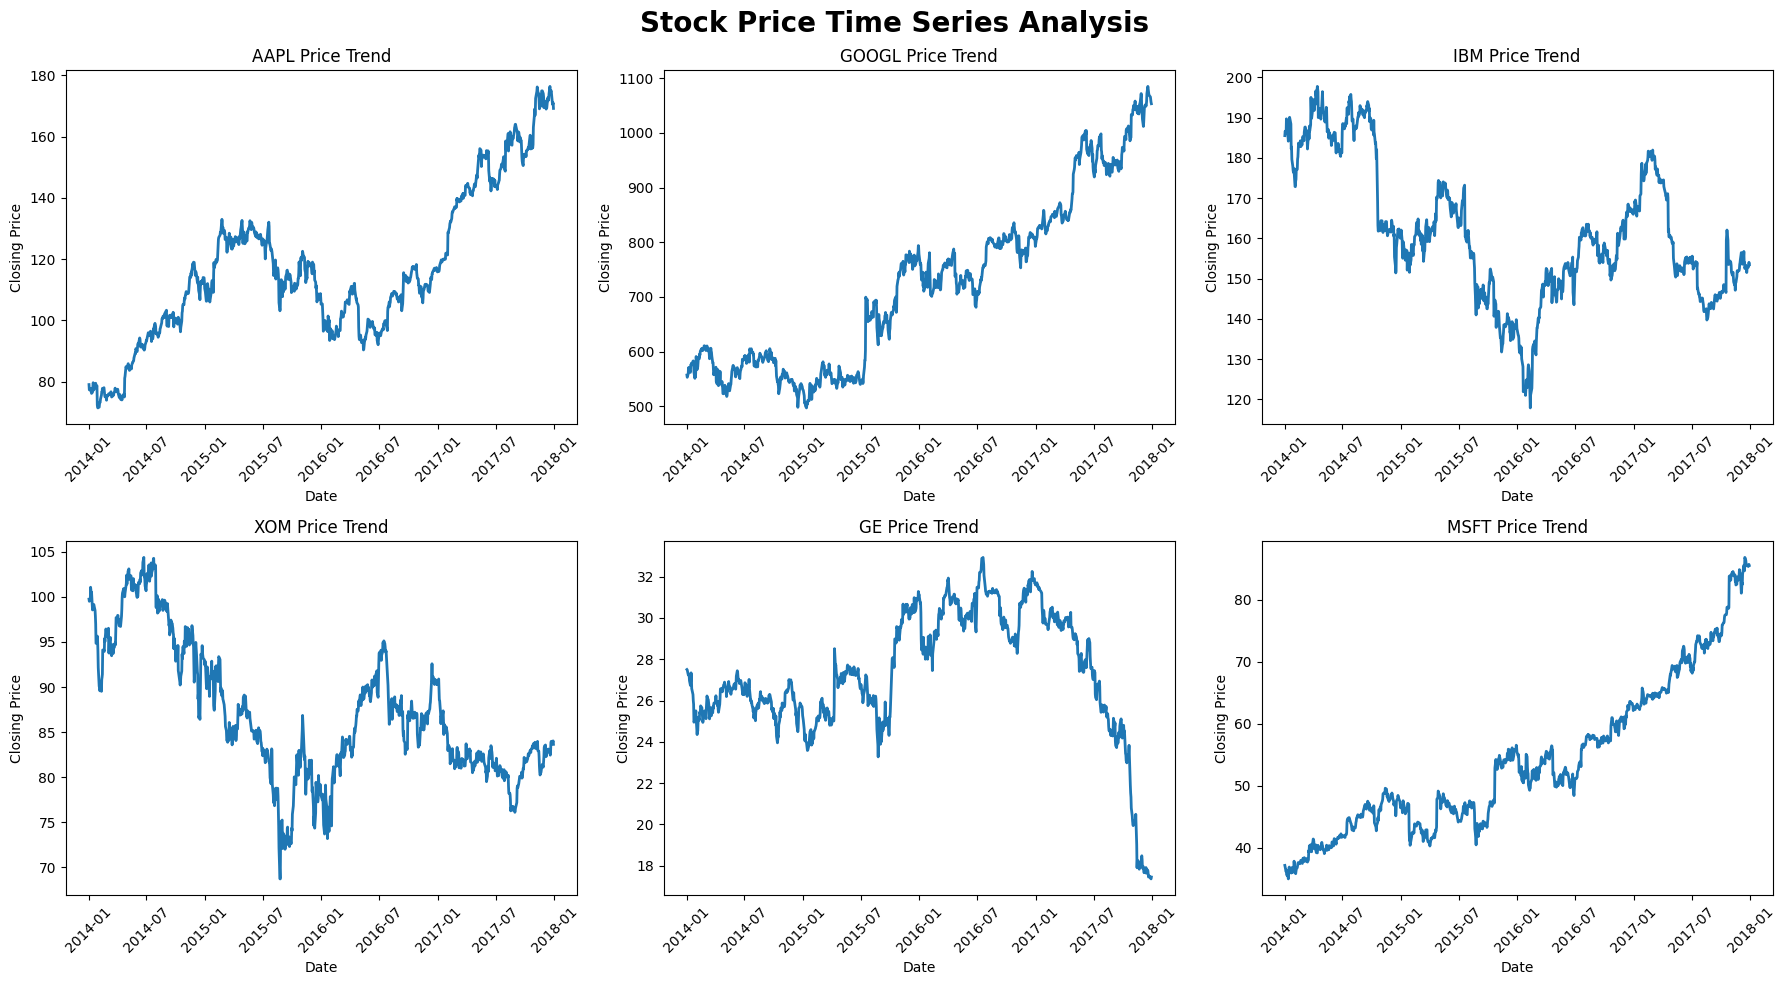

In [58]:
# Select a few representative stocks for time series analysis
sample_stocks = ['aapl', 'googl', 'ibm', 'xom', 'ge', 'msft']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Stock Price Time Series Analysis', fontsize=20, fontweight='bold')

for i, stock in enumerate(sample_stocks):
    stock_data = df[df['SYMBOL'] == stock].sort_values('DATE')
    row, col = i // 3, i % 3
    
    axes[row, col].plot(stock_data['DATE'], stock_data['CLOSE'], linewidth=2)
    axes[row, col].set_title(f'{stock.upper()} Price Trend')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Closing Price')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()


### 7. Volatility Analysis

In [59]:
df['Daily_Return'] = df.groupby('SYMBOL')['CLOSE'].pct_change()
volatility = df.groupby('SYMBOL')['Daily_Return'].std().dropna()

print("Top 10 Most Volatile Stocks:")
print(volatility.nlargest(10).round(4))

print("\nTop 10 Least Volatile Stocks:")
print(volatility.nsmallest(10).round(4))

Top 10 Most Volatile Stocks:
SYMBOL
chk     0.0455
amd     0.0391
lnt     0.0370
fcx     0.0370
bhge    0.0366
wmb     0.0323
mro     0.0322
evhc    0.0296
rrc     0.0291
incy    0.0286
Name: Daily_Return, dtype: float64

Top 10 Least Volatile Stocks:
SYMBOL
pep      0.0083
pg       0.0085
rsg      0.0085
ko       0.0086
wm       0.0086
jnj      0.0089
brk.b    0.0090
cb       0.0094
so       0.0094
ajg      0.0094
Name: Daily_Return, dtype: float64


### 8. Correlation Analysis

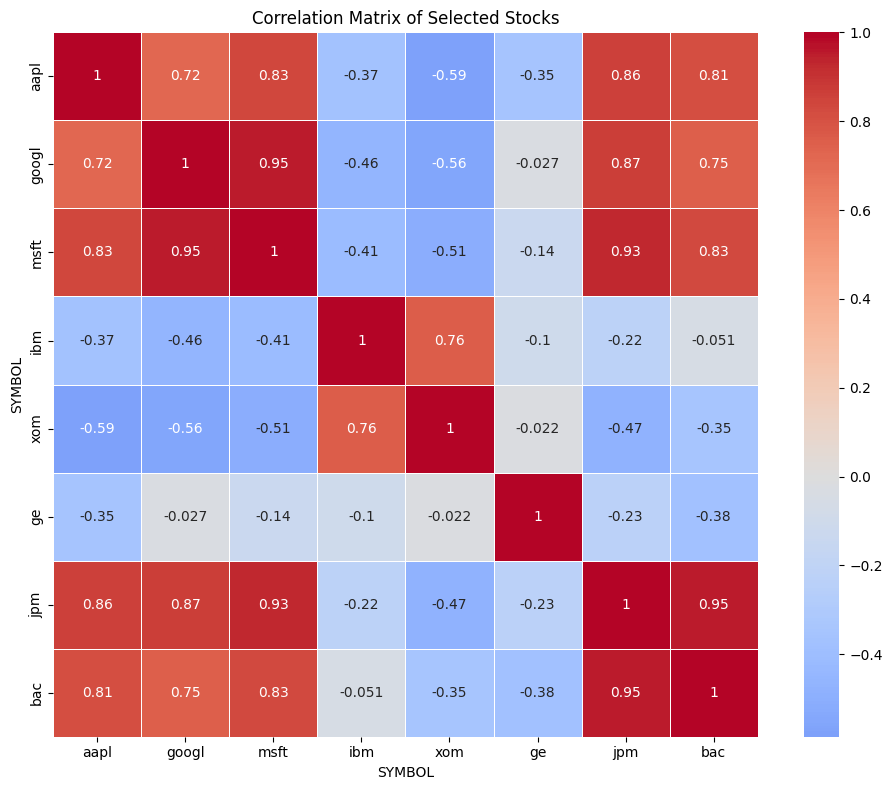

In [62]:
# Pivot to get closing prices by date and stock
pivot_data = df.pivot_table(index='DATE', columns='SYMBOL', values='CLOSE')

# Calculate correlation matrix for a sample of stocks
sample_corr_stocks = ['aapl', 'googl', 'msft', 'ibm', 'xom', 'ge', 'jpm', 'bac']
corr_matrix = pivot_data[sample_corr_stocks].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Selected Stocks')
plt.tight_layout()
plt.show()

In [63]:
# Insight 1: Overall Market Trend
market_avg = df.groupby('DATE')['CLOSE'].mean()
market_return = (market_avg.iloc[-1] - market_avg.iloc[0]) / market_avg.iloc[0] * 100
print(f"1. Overall Market Trend: {market_return:.2f}% change during the period")


1. Overall Market Trend: 49.27% change during the period


In [64]:
# Insight 2: Most Active Stocks
avg_volume_by_stock = df.groupby('SYMBOL')['VOLUME'].mean().sort_values(ascending=False)
print(f"\n2. Most Actively Traded Stock: {avg_volume_by_stock.index[0]} "
      f"(Avg Volume: {avg_volume_by_stock.iloc[0]:,.0f})")



2. Most Actively Traded Stock: bac (Avg Volume: 89,362,904)


In [67]:
# Insight 3: Highest Priced Stocks
avg_price_by_stock = df.groupby('SYMBOL')['CLOSE'].mean().sort_values(ascending=False)
print(f"\n3. Highest Priced Stock: {avg_price_by_stock.index[0]} "
      f"(Avg Price: ${avg_price_by_stock.iloc[0]:.2f})")


3. Highest Priced Stock: pcln (Avg Price: $1390.27)


In [68]:
# Insight 4: Daily Patterns
daily_avg_range = df.groupby(df['DATE'].dt.dayofweek)['Price_Range'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
print(f"\n7. Volatility by Day of Week:")
for day, vol in zip(days, daily_avg_range):
    print(f"   - {day}: ${vol:.2f} average daily range")


7. Volatility by Day of Week:
   - Mon: $1.55 average daily range
   - Tue: $1.55 average daily range
   - Wed: $1.62 average daily range
   - Thu: $1.63 average daily range
   - Fri: $1.55 average daily range


## Conclusions

1. Data Quality: The dataset contains clean stock price data for multiple stocks across several trading days.

2. Price Distribution: Stock prices show a right-skewed distribution with most stocks trading at lower prices and a few high-priced stocks.

3. Trading Volume: Volume distribution is heavily skewed, with a small number of stocks accounting for most trading activity.

4. Volatility: Different stocks show varying levels of volatility, with technology stocks generally being more volatile.

5. Correlations: Stocks within the same sector show higher correlations (e.g., technology stocks move together).

6. Sector Performance: Different sectors show varying average returns during the period.

7. Risk-Return Tradeoff: The scatter plot shows the classic risk-return relationship - higher potential returns typically come with higher volatility.